In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('raw_cr_loan2.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.drop_duplicates()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:

df.dropna(inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
columns = df.columns.tolist()

In [7]:
columns

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

defaulted.shape

In [8]:
defaulted = df.loc[df['loan_status'] == 1]
non_defaulted = df.loc[df['loan_status']==0]

In [9]:
defaulted.shape

(6203, 12)

In [10]:
non_defaulted.shape

(22435, 12)

In [11]:
defaulted.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [12]:
non_defaulted.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4


# AGE

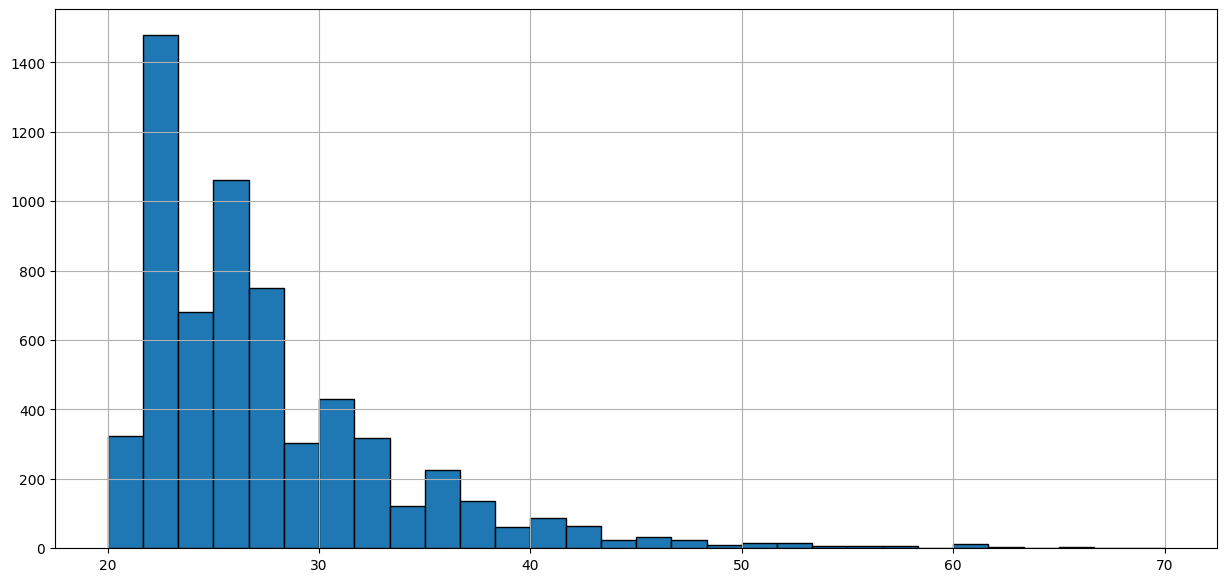

In [13]:
defaulted['person_age'].hist(edgecolor = "black",bins=30, figsize=(15,7));

# Income

In [14]:
defaulted['person_income'].describe()

count      6203.000000
mean      50054.547477
std       36896.713589
min        4000.000000
25%       30000.000000
50%       42000.000000
75%       60000.000000
max      703800.000000
Name: person_income, dtype: float64

<AxesSubplot: >

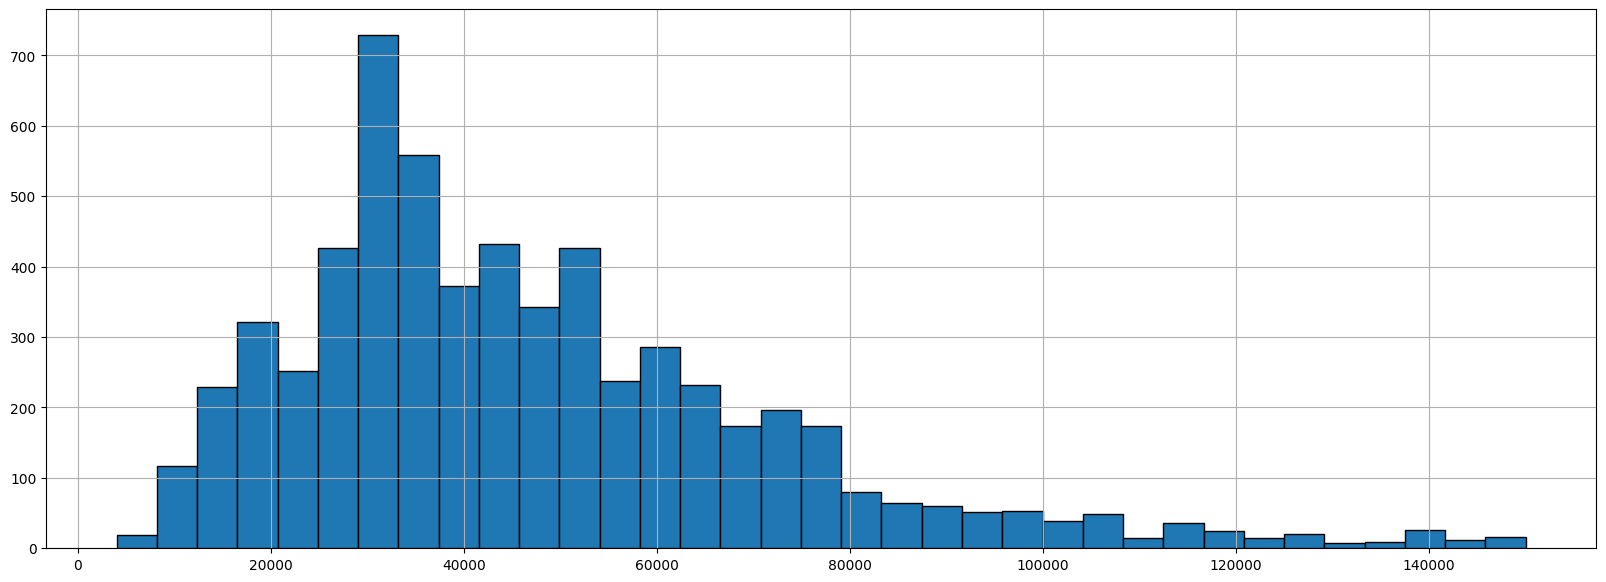

In [15]:
defaulted['person_income'].hist(edgecolor = "black",bins=35, range=[4000,150000],figsize=(20,7) )

# Loan Type

<AxesSubplot: >

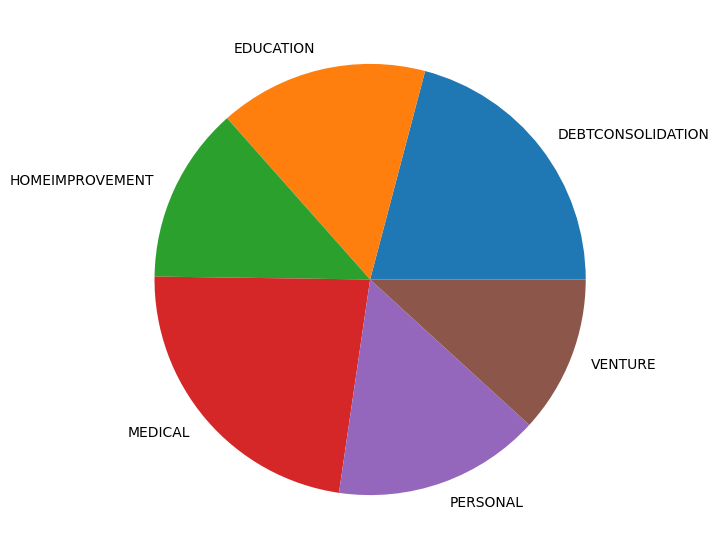

In [16]:
defaulted['loan_intent'].str.get_dummies(sep = ",").sum().plot.pie(figsize=(7,7))

# Interest Rate

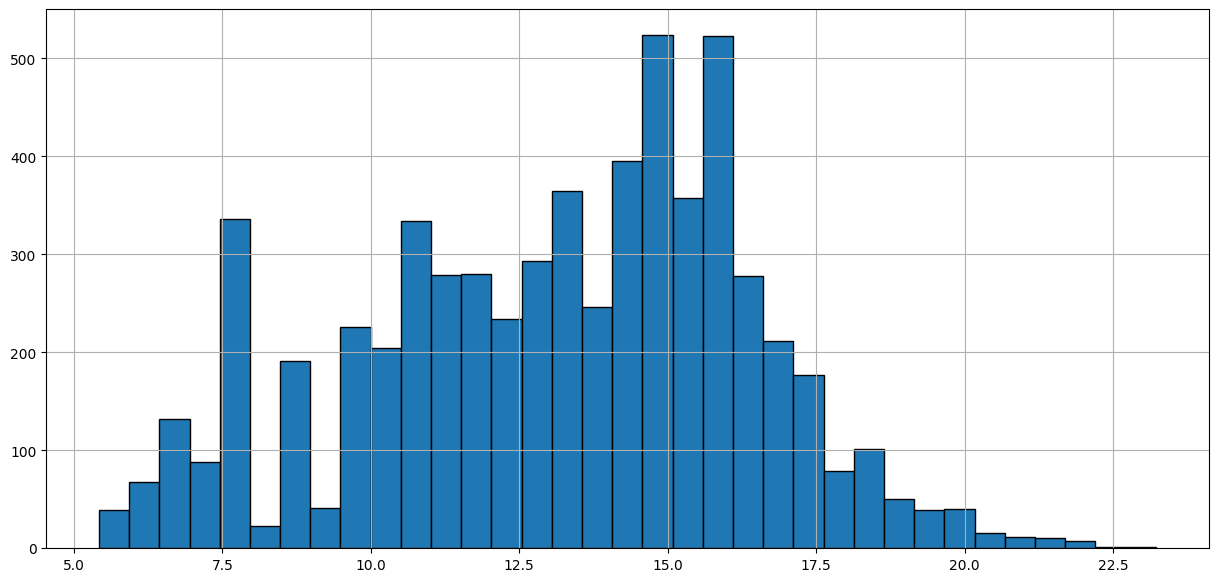

In [17]:
defaulted['loan_int_rate'].hist(edgecolor = "black",bins=35, figsize=(15,7));

# Home Ownership

<AxesSubplot: >

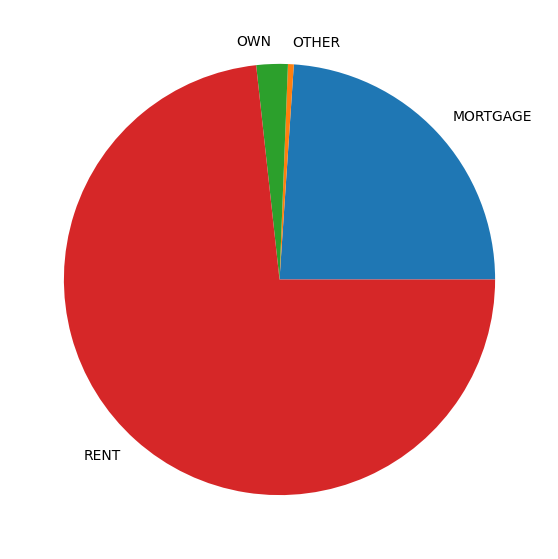

In [18]:
defaulted['person_home_ownership'].str.get_dummies(sep = ",").sum().plot.pie(figsize=(7,7))

# Emp Length

In [19]:
defaulted['person_emp_length'].describe()

count    6203.000000
mean        4.135741
std         4.157371
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       123.000000
Name: person_emp_length, dtype: float64

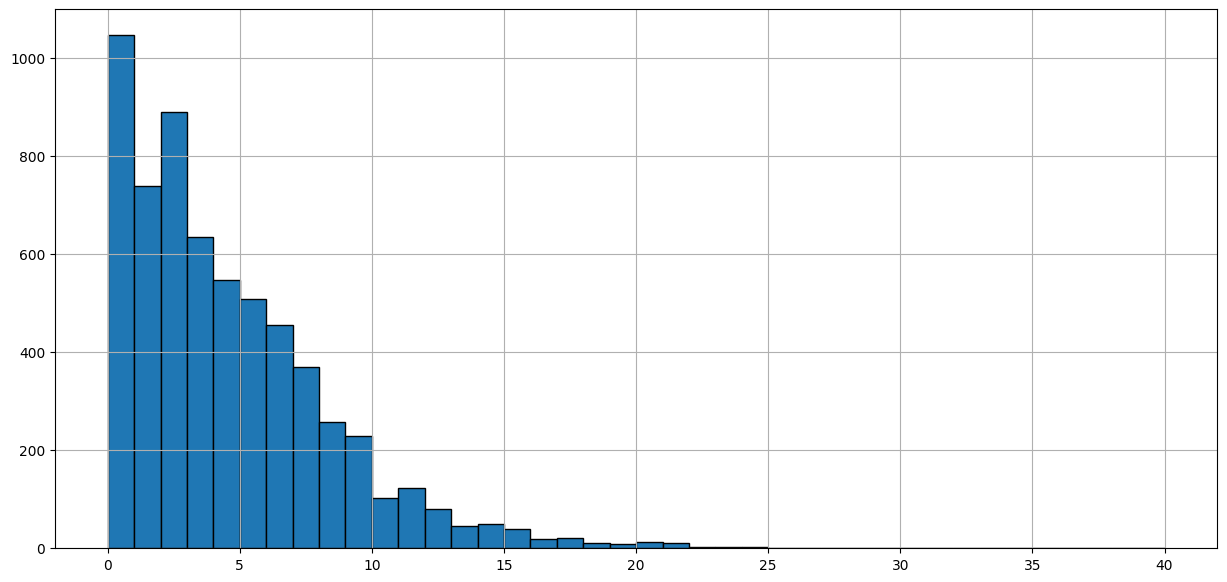

In [20]:
defaulted['person_emp_length'].hist(edgecolor = "black",figsize=(15,7),bins=40, range=(0,40));

# Loan Grade

<AxesSubplot: >

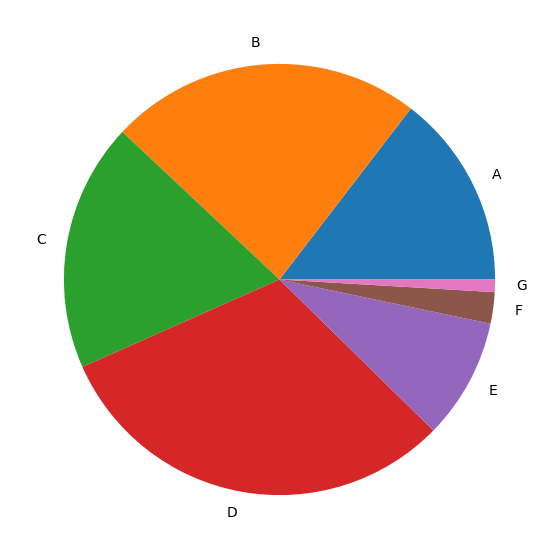

In [21]:
defaulted['loan_grade'].str.get_dummies(sep = ",").sum().plot.pie(figsize=(7,7))

# Loan Amount

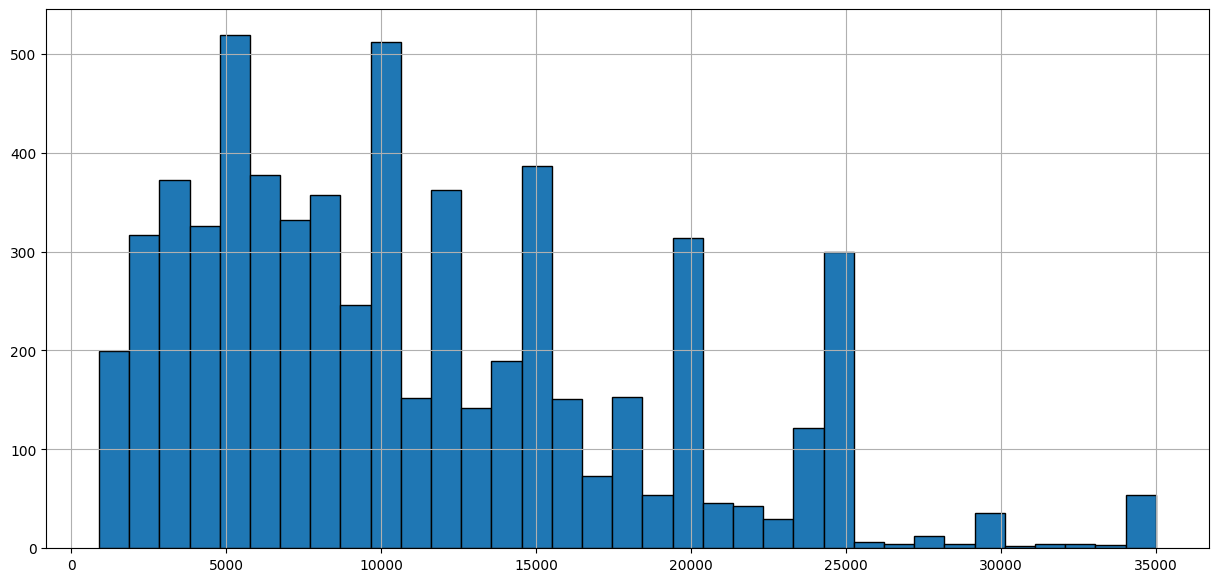

In [22]:
defaulted['loan_amnt'].hist(edgecolor = "black",bins=35, figsize=(15,7));

# Loan % income

<AxesSubplot: >

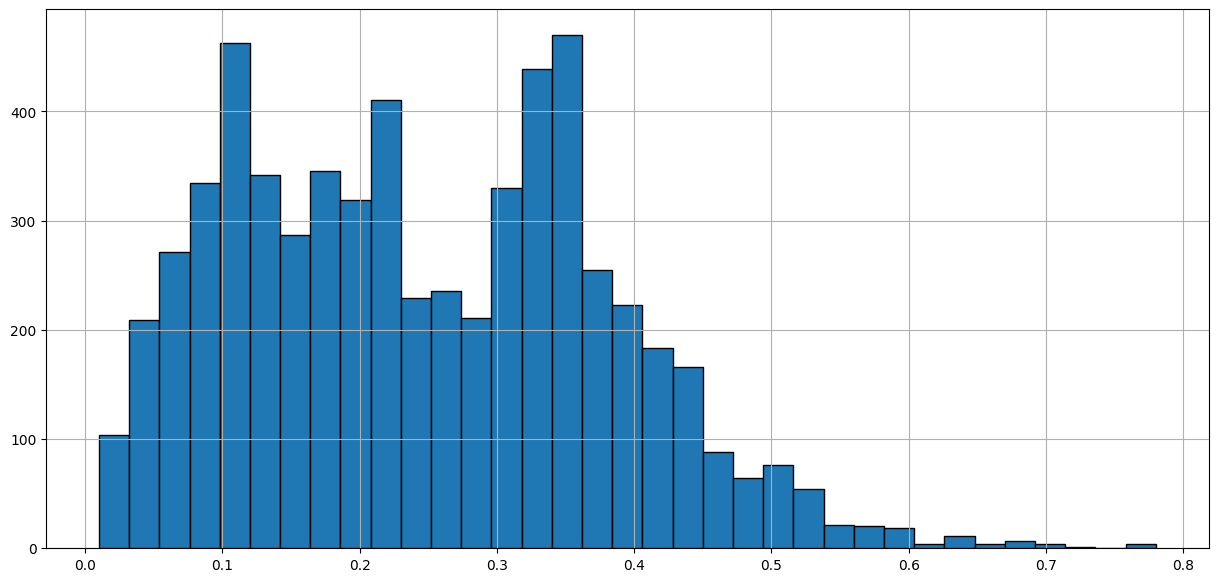

In [23]:
defaulted['loan_percent_income'].hist(edgecolor = "black",bins=35, figsize=(15,7))

# Credit History

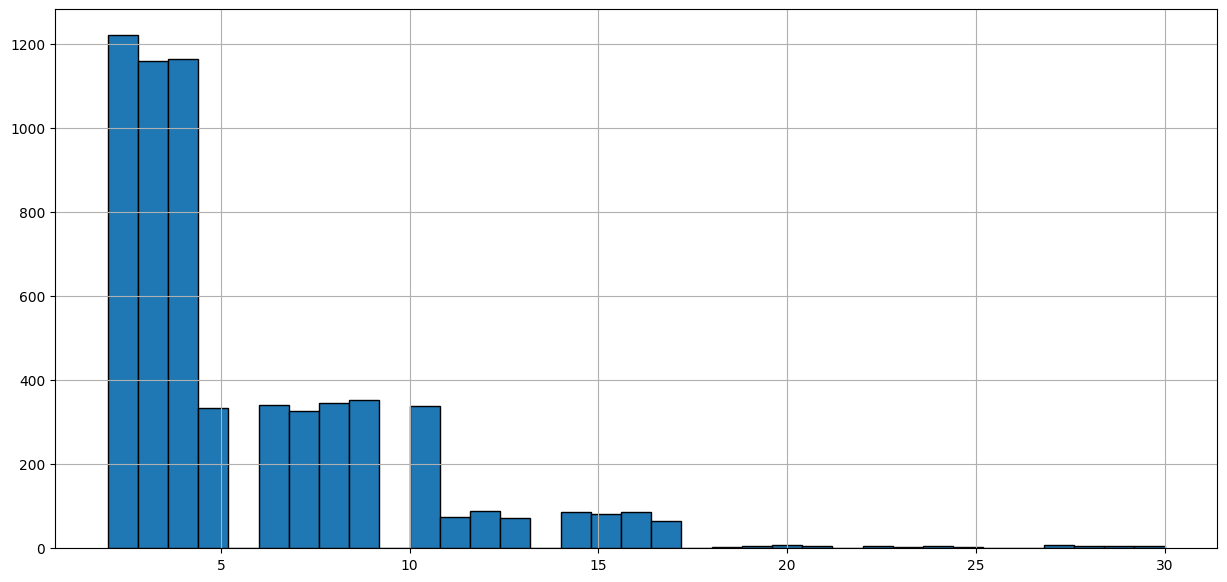

In [24]:
defaulted['cb_person_cred_hist_length'].hist(edgecolor = "black",bins=35, figsize=(15,7));

# Default History

<AxesSubplot: >

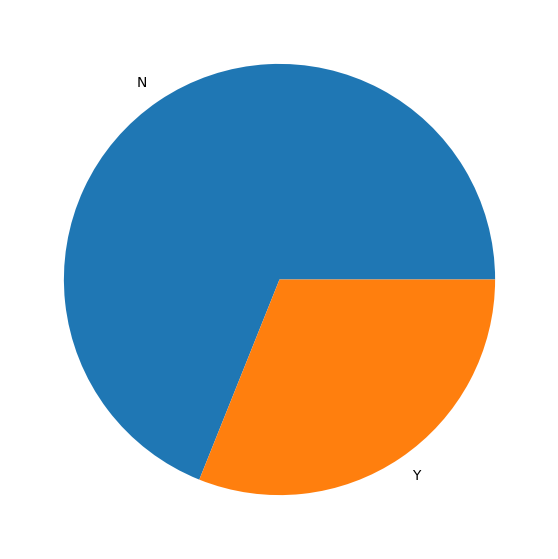

In [25]:
defaulted['cb_person_default_on_file'].str.get_dummies(sep = ",").sum().plot.pie(figsize=(7,7))

In [26]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [27]:
backup = df
# Converting the data to numbers:
df['person_home_ownership'].replace(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], [1, 2, 3, 4, 5], inplace=True)

In [28]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [29]:
df['loan_intent'].replace(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], [1, 2, 3, 4, 5, 6], inplace=True)

In [30]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [31]:
df['loan_grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [32]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [33]:
df['cb_person_default_on_file'].replace(['Y', 'N'], [1, 0], inplace=True)

In [34]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,1,123.0,1,4,35000,16.02,1,0.59,1,3
1,21,9600,3,5.0,2,2,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,3,3,5500,12.87,1,0.57,0,3
3,23,65500,1,4.0,3,3,35000,15.23,1,0.53,0,2
4,24,54400,1,8.0,3,3,35000,14.27,1,0.55,1,4


In [35]:
Y = pd.DataFrame(df['loan_status'])
X = pd.DataFrame(df)
X.drop(['loan_status'], axis=1, inplace=True)

In [36]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,1,123.0,1,4,35000,16.02,0.59,1,3
1,21,9600,3,5.0,2,2,1000,11.14,0.10,0,2
2,25,9600,2,1.0,3,3,5500,12.87,0.57,0,3
3,23,65500,1,4.0,3,3,35000,15.23,0.53,0,2
4,24,54400,1,8.0,3,3,35000,14.27,0.55,1,4


In [37]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [38]:
X.shape

(28638, 11)

In [39]:
Y.shape

(28638, 1)

In [40]:
df.shape
df['loan_status'] = Y

In [41]:
df.shape

(28638, 12)

In [42]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,1,123.0,1,4,35000,16.02,1,0.59,1,3
1,21,9600,3,5.0,2,2,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,3,3,5500,12.87,1,0.57,0,3
3,23,65500,1,4.0,3,3,35000,15.23,1,0.53,0,2
4,24,54400,1,8.0,3,3,35000,14.27,1,0.55,1,4


In [43]:

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [44]:

nm = NearMiss()
sm = SMOTE()
X_under, y_under = nm.fit_resample(X,Y)
X_over, y_over = sm.fit_resample(X,Y)

In [45]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42)

In [46]:
df_over = pd.DataFrame(X_over, columns=columns)

In [47]:
df_under = pd.DataFrame(X_under, columns=columns)

In [48]:
df_over['loan_status'] = y_over

In [49]:
df_under['loan_status'] = y_under

In [50]:
df_under['loan_status'].value_counts()

0    6203
1    6203
Name: loan_status, dtype: int64

In [51]:
df_over['loan_status'].value_counts()

1    22435
0    22435
Name: loan_status, dtype: int64

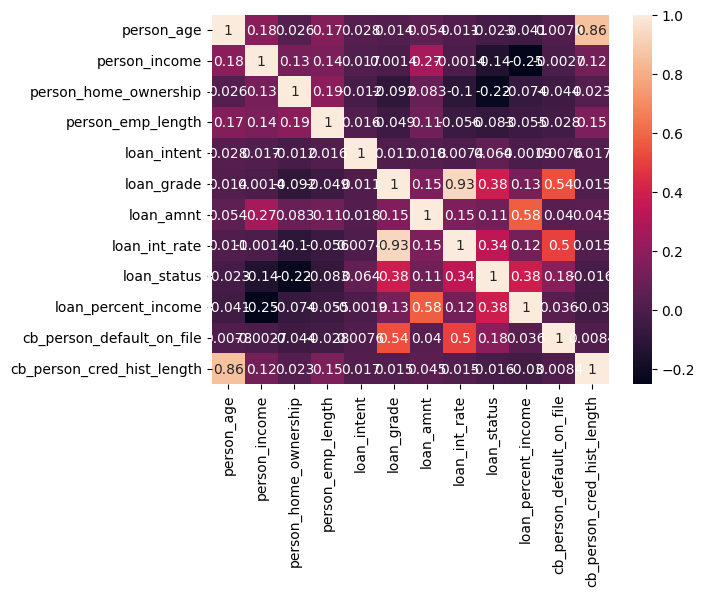

In [52]:

sns.heatmap(df.corr(), annot = True)
plt.show()
     

In [53]:
defaulted_under = df_under.loc[df_under['loan_status'] == 1]
non_defaulted_under = df_under.loc[df_under['loan_status']==0]

In [54]:
defaulted_over = df_under.loc[df_over['loan_status'] == 1]
non_defaulted_over = df_over.loc[df_over['loan_status']==0]

<AxesSubplot: >

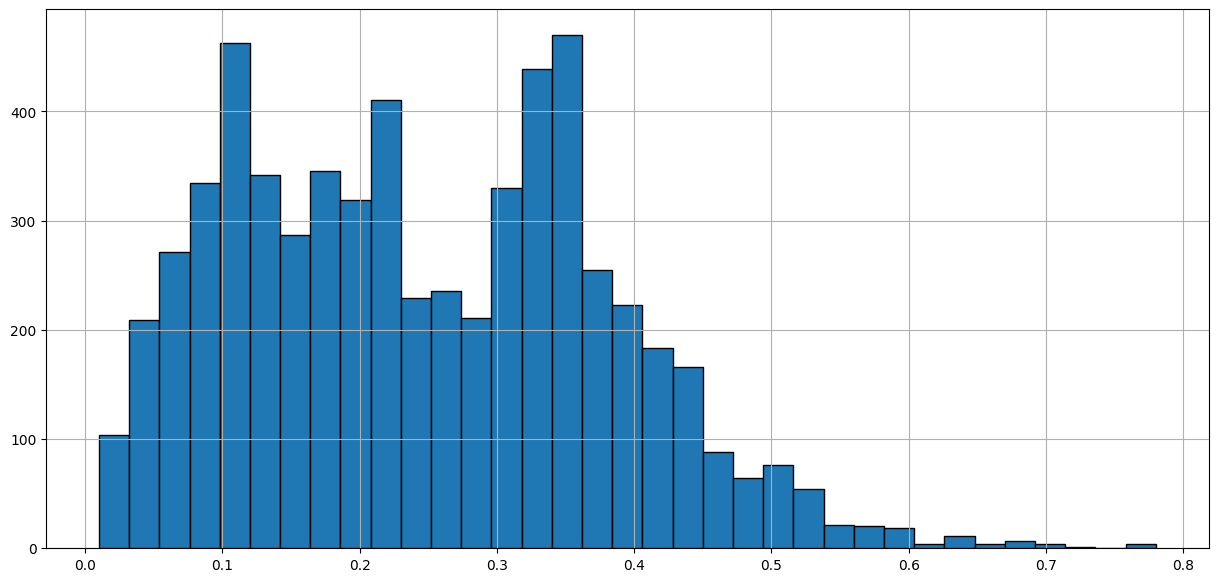

In [55]:
defaulted_under['loan_percent_income'].hist(edgecolor = "black",bins=35, figsize=(15,7))

<AxesSubplot: >

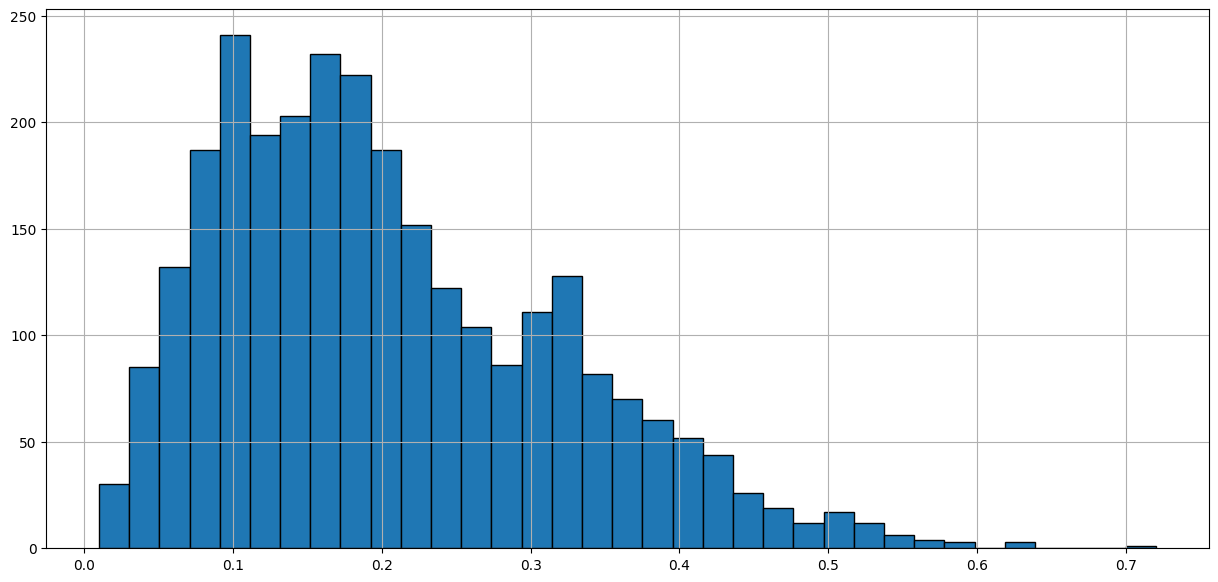

In [56]:
defaulted_over['loan_percent_income'].hist(edgecolor = "black",bins=35, figsize=(15,7))

<AxesSubplot: >

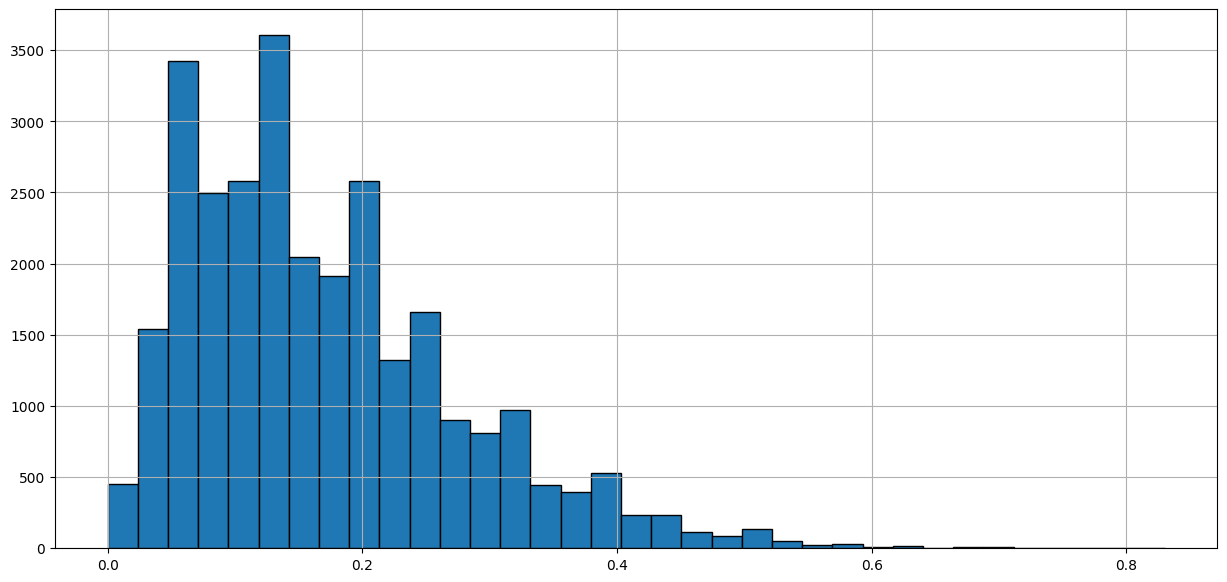

In [57]:
df['loan_percent_income'].hist(edgecolor = "black",bins=35, figsize=(15,7))

<AxesSubplot: >

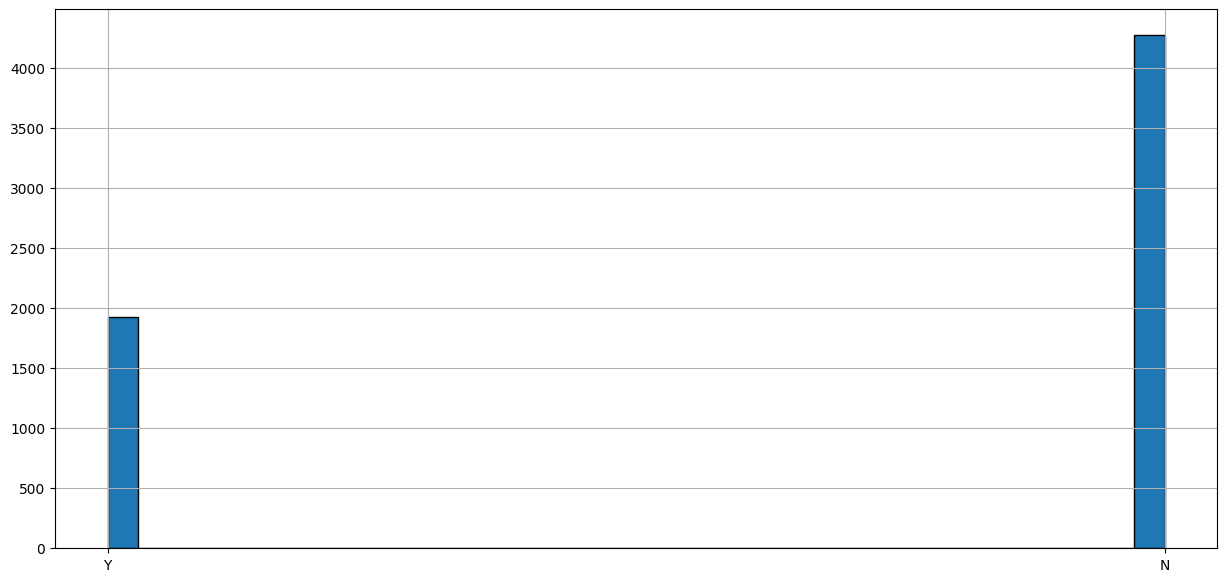

In [58]:
defaulted['cb_person_default_on_file'].hist(edgecolor = "black",bins=35, figsize=(15,7))

In [59]:

def outlier_thresholds(data, variable):
    quartile1 = data[variable].quantile(0.10)
    quartile3 = data[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def has_outliers(data, variable):
    low_limit, up_limit = outlier_thresholds(data, variable)
    if data[(data[variable] < low_limit) | (data[variable] > up_limit)].any(axis=None):
        print(variable)
print("OUTLIERS: ")

for col in df_under.columns:
    has_outliers(df_under, col)


def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
replace_with_thresholds(df_under, df_under.columns)
for col in df_under.columns:
    has_outliers(df_under, col)
df_under.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

OUTLIERS: 
person_age
person_income
person_home_ownership
person_emp_length
cb_person_cred_hist_length


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
person_age,12406.0,27.392431,5.975755,20.00,21.00,23.00,26.00,30.00,35.00,39.00,49.00,54.50
person_income,12406.0,47052.990085,22985.150560,4000.00,19200.00,31000.00,43000.00,56253.00,75000.00,87994.00,143950.00,151500.00
person_home_ownership,12406.0,1.442850,0.627528,1.00,1.00,1.00,1.00,2.00,2.00,3.00,3.00,3.50
person_emp_length,12406.0,4.250806,3.781741,0.00,0.00,1.00,3.00,6.00,9.00,12.00,17.00,22.50
loan_intent,12406.0,3.382315,1.693616,1.00,1.00,2.00,3.00,5.00,6.00,6.00,6.00,6.00
loan_grade,12406.0,2.530227,1.297446,1.00,1.00,1.00,2.00,4.00,4.00,5.00,6.00,7.00
loan_amnt,12406.0,9382.284782,6281.012159,725.00,2050.00,5000.00,8000.00,12000.00,19750.00,24000.00,26380.00,35000.00
loan_int_rate,12406.0,11.795434,3.378588,5.42,6.39,9.01,11.83,14.42,16.02,17.03,19.29,23.22
loan_status,12406.0,0.500000,0.500020,0.00,0.00,0.00,0.50,1.00,1.00,1.00,1.00,1.00
loan_percent_income,12406.0,0.209845,0.117830,0.01,0.06,0.12,0.19,0.29,0.38,0.42,0.52,0.78


In [61]:
print("OUTLIERS: ")
for col in df_over.columns:
    has_outliers(df_over, col)

replace_with_thresholds(df_over, df_over.columns)
for col in df_over.columns:
    has_outliers(df_over, col)
df_over.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

OUTLIERS: 
person_age
person_income
person_home_ownership
person_emp_length
cb_person_cred_hist_length


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
person_age,44870.0,27.388478,5.740437,20.00,22.00,23.000000,26.00,30.000000,35.00,39.00,49.000000,54.500000
person_income,44870.0,59271.562180,36273.594559,4000.00,19200.00,34449.500000,50274.00,73000.000000,102941.10,130000.00,219852.750000,219852.750000
person_home_ownership,44870.0,1.413483,0.594811,1.00,1.00,1.000000,1.00,2.000000,2.00,3.00,3.000000,3.500000
person_emp_length,44870.0,4.510637,3.760445,0.00,0.00,2.000000,4.00,6.363092,9.00,12.00,17.000000,22.355612
loan_intent,44870.0,3.263695,1.595783,1.00,1.00,2.000000,3.00,4.000000,6.00,6.00,6.000000,6.000000
loan_grade,44870.0,2.413105,1.191120,1.00,1.00,1.000000,2.00,3.000000,4.00,4.00,5.000000,7.000000
loan_amnt,44870.0,10143.837107,6665.079207,500.00,2057.45,5000.000000,8550.00,14000.000000,20000.00,24617.00,30000.000000,35000.000000
loan_int_rate,44870.0,11.803888,3.230993,5.42,6.54,9.386268,11.89,14.270000,15.95,16.77,18.759948,23.220000
loan_status,44870.0,0.500000,0.500006,0.00,0.00,0.000000,0.50,1.000000,1.00,1.00,1.000000,1.000000
loan_percent_income,44870.0,0.197054,0.121591,0.00,0.04,0.100000,0.17,0.280000,0.37,0.42,0.530000,0.830000


In [62]:
print("OUTLIERS: ")
for col in df.columns:
    has_outliers(df, col)

replace_with_thresholds(df, df.columns)
for col in df.columns:
    has_outliers(df, col)
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

OUTLIERS: 
person_age
person_income
person_home_ownership
person_emp_length
loan_percent_income
cb_person_cred_hist_length


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
person_age,28638.0,27.696103,6.069720,20.00,22.00,23.00,26.00,30.00,36.00,40.00,50.00,57.000
person_income,28638.0,65045.824708,38382.108592,4000.00,24000.00,39480.00,55956.00,80000.00,112000.00,140000.00,230790.24,236500.000
person_home_ownership,28638.0,1.573364,0.640331,1.00,1.00,1.00,1.00,2.00,2.00,3.00,3.00,3.500
person_emp_length,28638.0,4.778476,4.018885,0.00,0.00,2.00,4.00,7.00,10.00,13.00,18.00,25.000
loan_intent,28638.0,3.336406,1.680249,1.00,1.00,2.00,3.00,5.00,6.00,6.00,6.00,6.000
loan_grade,28638.0,2.228158,1.170746,1.00,1.00,1.00,2.00,3.00,4.00,4.00,5.00,7.000
loan_amnt,28638.0,9656.493121,6329.683361,500.00,2000.00,5000.00,8000.00,12500.00,19465.00,24000.00,29383.50,35000.000
loan_int_rate,28638.0,11.039867,3.229372,5.42,6.03,7.90,10.99,13.48,15.31,16.32,18.62,23.220
loan_status,28638.0,0.216600,0.411935,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.000
loan_percent_income,28638.0,0.169478,0.106337,0.00,0.04,0.09,0.15,0.23,0.32,0.38,0.50,0.725


In [63]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [64]:

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_t_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_scaled, y_train)


/home/aadarsh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:

model.score(X_scaled, y_train)

0.8556962025316456

In [66]:
model.score(X_t_scaled, y_test)

0.852304469273743

In [67]:

predictions = model.predict(X_t_scaled)

In [68]:

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
c_matrix = confusion_matrix(y_test,predictions)
print(c_matrix)

[[4250  193]
 [ 653  632]]


In [70]:

print(f"Accuracy : {accuracy_score(y_test,predictions)}")
print(f"Precision: {precision_score(y_test,predictions)}")
print(f"Recall Score : {recall_score(y_test,predictions)}")
print(f"F1 Score : {f1_score(y_test,predictions)}")

Accuracy : 0.852304469273743
Precision: 0.7660606060606061
Recall Score : 0.49182879377431904
F1 Score : 0.5990521327014218


In [71]:

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42)

In [72]:


scaler = StandardScaler().fit(X_train_under)
X_under_scaled = scaler.transform(X_train_under)
model = LogisticRegression()
model.fit(X_under_scaled, y_train_under)

/home/aadarsh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [73]:

X_under_stest = scaler.transform(X_test_under)

In [74]:

predictions = model.predict(X_under_stest)
     

In [75]:
c_matrix = confusion_matrix(y_test_under,predictions)
print(c_matrix)
     

[[1005  267]
 [ 308  902]]


In [76]:

print(f"Accuracy : {accuracy_score(y_test_under,predictions)}")
print(f"Precision: {precision_score(y_test_under,predictions)}")
print(f"Recall Score : {recall_score(y_test_under,predictions)}")
print(f"F1 Score : {f1_score(y_test_under,predictions)}")

Accuracy : 0.7683319903303787
Precision: 0.7715996578272027
Recall Score : 0.7454545454545455
F1 Score : 0.7583018074821354


In [78]:
model.score(X_under_stest, y_test_under)

0.7683319903303787

In [79]:
model.score(X_under_scaled, y_train_under)

0.7678355501813785

In [80]:

scaler = StandardScaler().fit(X_train_over)
X_over_scaled = scaler.transform(X_train_over)
model = LogisticRegression()
model.fit(X_over_scaled, y_train_over)
     

/home/aadarsh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [81]:

X_over_stest = scaler.transform(X_test_over)
     


In [82]:

predictions_over = model.predict(X_over_stest)


In [83]:

print(f"Accuracy : {accuracy_score(y_test_over,predictions_over)}")
print(f"Precision: {precision_score(y_test_over,predictions_over)}")
print(f"Recall Score : {recall_score(y_test_over,predictions_over)}")
print(f"F1 Score : {f1_score(y_test_over,predictions_over)}")

Accuracy : 0.7979719188767551
Precision: 0.7914754098360656
Recall Score : 0.8082589285714286
F1 Score : 0.7997791275538375


In [84]:

model.score(X_over_stest, y_test_over)

0.7979719188767551

In [85]:

model.score(X_over_scaled, y_train_over)


0.794796077557388